In [71]:
import sklearn
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [72]:
data = load_breast_cancer()

In [73]:
df= pd.DataFrame(data.data,columns=data.feature_names)

In [74]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [75]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [76]:
# sklearn kmeans
kmeans = KMeans(n_clusters=2,random_state=142)
preds = kmeans.fit_predict(df)
preds

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [77]:
import random

class Cluster:
    def __init__(self,center):
        self.center=center
        self.points=[]
    def distance(self,point):
        return np.sqrt(np.sum((point-self.center)**2))

class KMean:
    def __init__(self,no_of_c=2,iters=20):
        self.no_of_c=no_of_c
        self.iters=iters
        
    def fit(self,X):
        clusters=[]
        
        for i in range(self.no_of_c):
            cluster=Cluster(center=random.choice(X))
            clusters.append(cluster)
        
        for i in range(self.iters):
            labels=[]
            for point in X:
                distances=[]
                for cluster in clusters:
                    distances.append(cluster.distance(point))
                near_indx=np.argmin(distances)
                near_cluster=clusters[near_indx]
                near_cluster.points.append(point)
                labels.append(near_indx)
                
            for cluster in clusters:
                cluster.center=np.mean(cluster.points,axis=0)
            
        self.labels_=labels
        self.cluster_centers_=[cluster.center for cluster in clusters]
        self.clusters=clusters
        
    def predict(self,X):
        predicted=[]
        for p in X:
            distances=[]
            for cluster in self.clusters:
                distances.append(cluster.distance(p))
            near_indx=np.argmin(distances)
            predicted.append(near_indx)
            
        return predicted
                
            

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33, random_state=42)
model=KMean(no_of_c=2)
model.fit(X_train)

In [82]:
from scipy.stats import mode
labels = np.zeros_like(model.labels_)
for i in range(2):
    mask = (np.array(model.labels_) == i)
    labels[mask] = mode(y_train[mask])[0]
print(labels)

[1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1
 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0
 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0
 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1
 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0
 1 1 1 1 0 1 1 1 1 1 1]


In [51]:
print(y_train)

[0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1
 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0
 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1
 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0
 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0
 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1
 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0
 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1
 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0
 1 0 0 1 0 1 1 1 1 0 1]


Text(91.68, 0.5, 'predicted label')

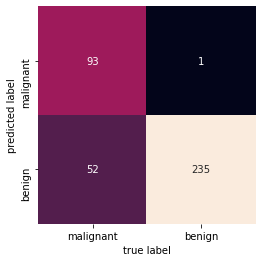

In [85]:
mat = confusion_matrix(y_train, labels)
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=data.target_names,
yticklabels=data.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')